<a href="https://colab.research.google.com/github/ueche/ml-class/blob/main/projects/Ulysses_Echeverria_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMAGE CLASSIFICATION PROJECT**

---



# **The CIFAR-10 dataset**

The following is from Alex Frizhevsky's description of the dataset.

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

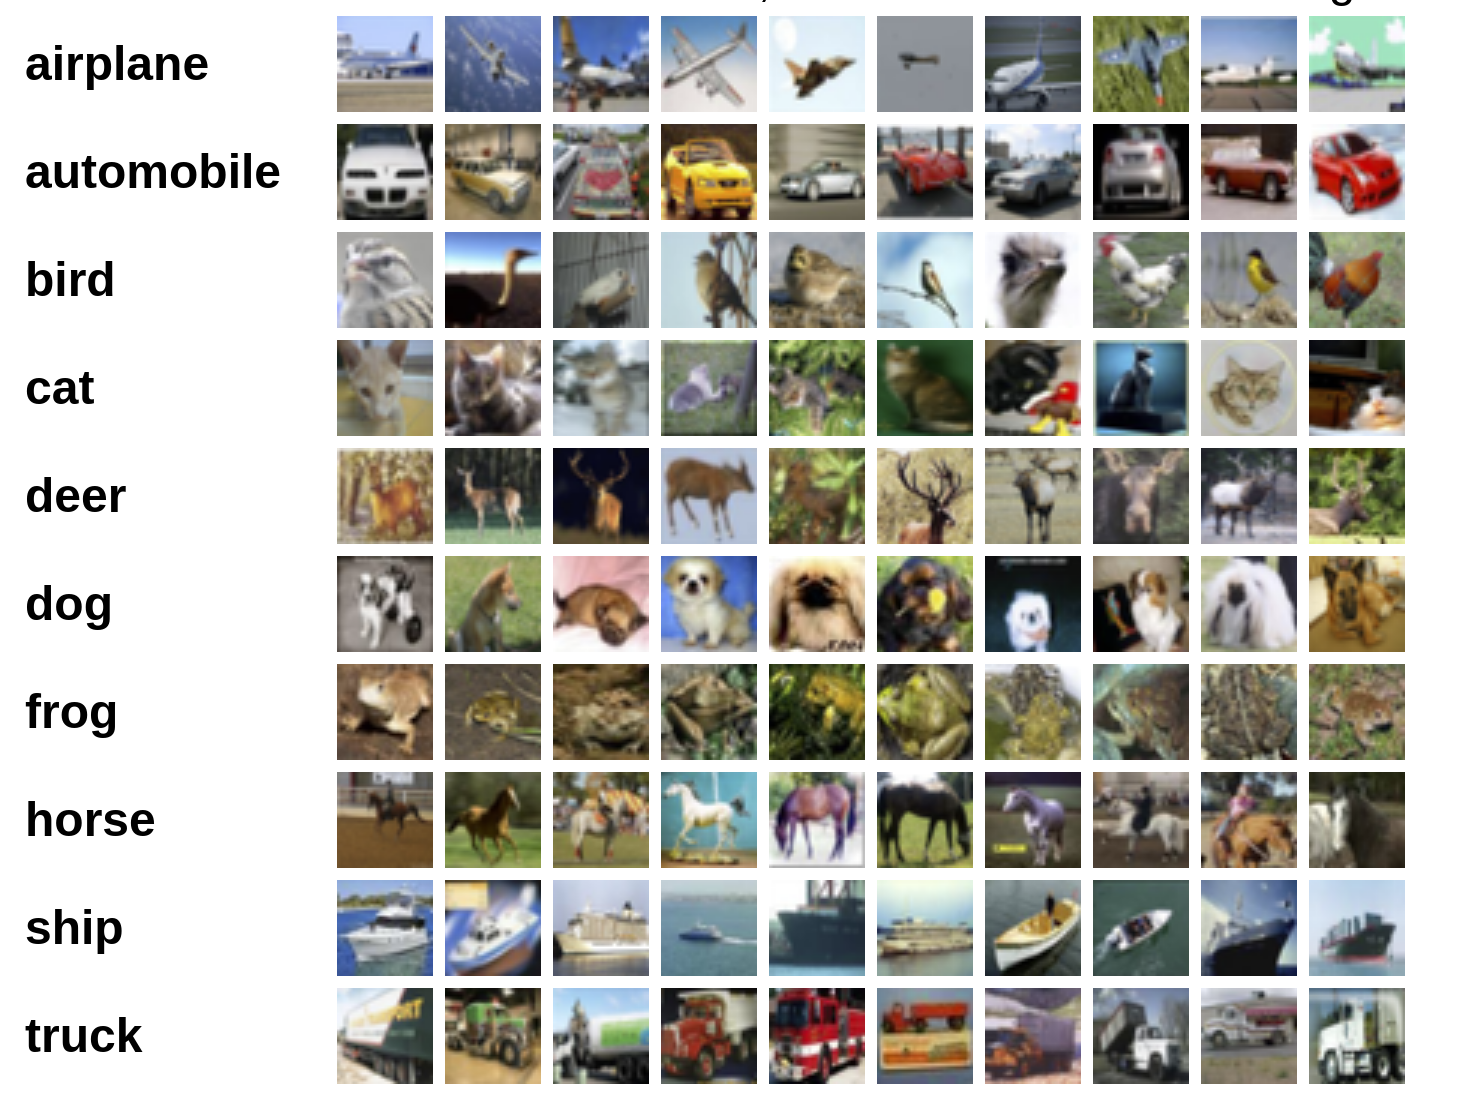

CIFAR-10 is widely used for benchmarking and testing machine learning algorithms, particularly convolutional neural networks (CNNs), which are well-suited for image classification tasks. The dataset was created by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton, and it is a subset of the larger CIFAR-100 dataset that contains 100 classes with 600 images each.

# **Data**
Dataset from Kaggle

The data is divided into training, testing, and prediction datasets. There are 25,000 images.

You are to classify the images in one of six categories

{'buildings' -> 0, 'forest' -> 1, 'glacier' -> 2, 'mountain' -> 3, 'sea' -> 4, 'street' -> 5 }

The images are 150x150x3. This is similar to the dog/cat dataset we already worked with. In the dog/cat dataset the task was a binary classification (dog or not). In this one, again, there are 6 categories. So some similarities and some differences.

# **Load The Data**

Since this is such a common dataset, Keras has the dataset built in to its library.

In [1]:
#import the keras dataset using tensorflo and keras
import tensorflow as tf
from keras.datasets import cifar10

# download and load the cifar-10 dataset directly from Keras
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


### Preprocess the data

Normalizing the data helps the model to converge faster during training and improves the overall performance. Just as with the Dog and Cat images we worked with on a previous lab, we will divide the pixel values by 255 to normalize the data to a value from 0 to 1. 

In [2]:

# The image shape downloaded from Keras is 32 x 32 
train_images.shape

(50000, 32, 32, 3)

The dataset has a shape of 50,000 images, where each image has a dimension of 32x32 pixels and 3 color channels (RGB). In other words, it's a dataset containing 50,000 RGB images, each with a height and width of 32 pixels. 

In [3]:
# Normalize pixel values to the range 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [4]:
# we are classifying the images into ten categories so I plan to use categorical crossentrpy. 
# This will require us to one_hot_encode the labels.

# One-hot encode the labels into 10 classes using Keras 
#from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical
import numpy as np

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


### Build the CNN model

Similar to the CNN model used in the Dogs and Cats lab this model will have 3 Conv2D layers layers with a MaxPooling2D layer after each one. We will use relu for acctivation and the input shape is 32X32x3 consistiong of the shape of the image and the RGB three color scheme. The seventh layer will flatten the Array followed by a Dense layer of activation relu.The output layer will have 10 nodes representing the number of categories and since the output is categorical we will use activation softmax.

In [5]:

# Create a simple CNN model using Keras
from keras import layers, models

# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)      

Next we compile the model

In [6]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Lets look at the shape of the data
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

Train labels shape: (50000, 10)
Test labels shape: (10000, 10)


Next we train the model by fitting it with the training data. We start with epoch = 5 and well set the validation_data to 10% of the training data.

In [8]:
# Train the model
history = model.fit(train_images, train_labels, 
                    epochs=10, 
                    validation_split=0.1)


Epoch 1/10
1407/1407 [==============================] - 21s 6ms/step - loss: 1.5649 - accuracy: 0.4308 - val_loss: 1.2770 - val_accuracy: 0.5468
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1897 - accuracy: 0.5789 - val_loss: 1.1548 - val_accuracy: 0.5970
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0312 - accuracy: 0.6346 - val_loss: 1.0038 - val_accuracy: 0.6476
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9301 - accuracy: 0.6733 - val_loss: 0.9326 - val_accuracy: 0.6806
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8586 - accuracy: 0.6974 - val_loss: 0.9026 - val_accuracy: 0.6874
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7940 - accuracy: 0.7207 - val_loss: 0.8901 - val_accuracy: 0.6866
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7489 - accuracy: 0.7366 - val_loss: 0.8352 - val_accuracy

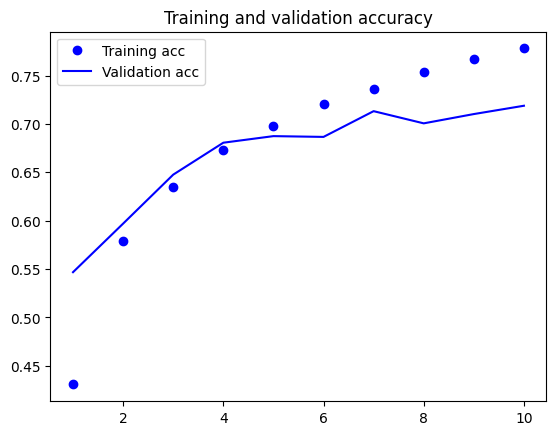

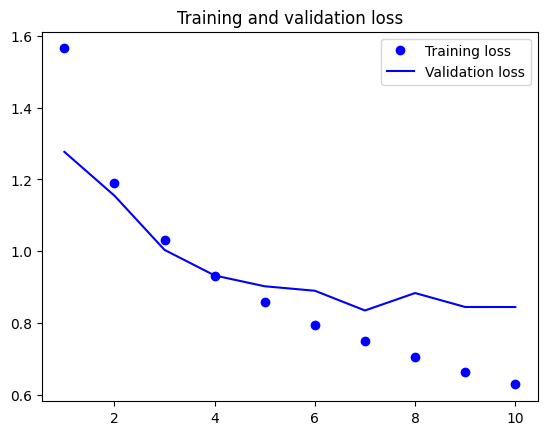

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)

print("Accuracy:", accuracy)

Accuracy: 0.7038000226020813


Lets add BatchNormalization layers and Dropout layers to address overfitting. I also want to play around with some data augmentation
https://medium.datadriveninvestor.com/2-layers-to-greatly-improve-keras-cnn-1d4d1c3e8ea5

https://www.analyticsvidhya.com/blog/2021/01/building-a-cnn-model-with-95-accuracy/

In [11]:
# Create a simple CNN model using Keras
from keras import layers, models

# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))




In [17]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)      

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create an image data generator for data augmentation using keras.
from keras.preprocessing.image import ImageDataGenerator

#
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1)

In [13]:
# Train the model using data augmentation and 10% validation data as well as 
# increasing the batch size to 64 and the epochs to 50
batch_size = 64
epochs = 50
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    steps_per_epoch=train_images.shape[0] // batch_size,
                    epochs=epochs, 
                    validation_data=(test_images, test_labels))


Epoch 1/50
781/781 [==============================] - 35s 39ms/step - loss: 1.9414 - accuracy: 0.3303 - val_loss: 1.4094 - val_accuracy: 0.4833
Epoch 2/50
781/781 [==============================] - 31s 39ms/step - loss: 1.5113 - accuracy: 0.4486 - val_loss: 1.5670 - val_accuracy: 0.4424
Epoch 3/50
781/781 [==============================] - 31s 39ms/step - loss: 1.3891 - accuracy: 0.5011 - val_loss: 1.2101 - val_accuracy: 0.5728
Epoch 4/50
781/781 [==============================] - 31s 40ms/step - loss: 1.2985 - accuracy: 0.5372 - val_loss: 1.2601 - val_accuracy: 0.5661
Epoch 5/50
781/781 [==============================] - 31s 39ms/step - loss: 1.2518 - accuracy: 0.5566 - val_loss: 1.2495 - val_accuracy: 0.5480
Epoch 6/50
781/781 [==============================] - 30s 39ms/step - loss: 1.2011 - accuracy: 0.5769 - val_loss: 1.1685 - val_accuracy: 0.5809
Epoch 7/50
781/781 [==============================] - 31s 39ms/step - loss: 1.1701 - accuracy: 0.5887 - val_loss: 1.0370 - val_accuracy:

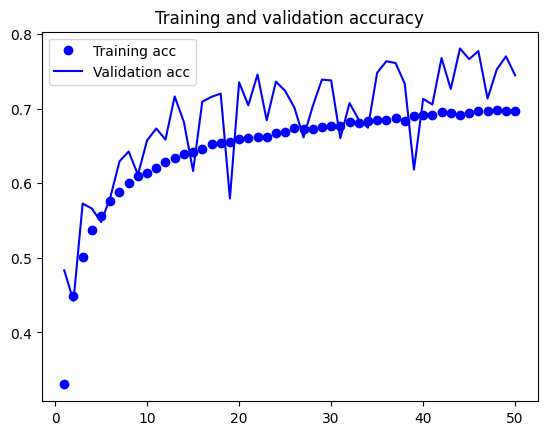

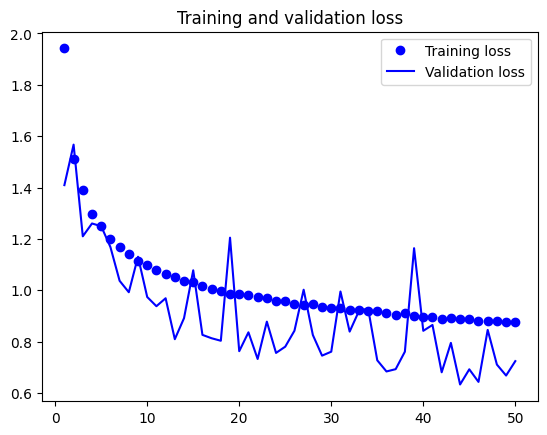

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.show()

In [15]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - loss: 0.7242 - accuracy: 0.7446 - 842ms/epoch - 3ms/step
Test accuracy: 0.7445999979972839


I wanted to learn GoogLeNet for this project. I plan to spend a lot more time learning ML models over the summer. 